In [2]:
pip install pandas numpy sklearn scanpy sklearn statsmodels scipy matplotlib seaborn umap-learn

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import scanpy as sc
import scipy as sp
import numpy as np
import anndata

sc.settings.verbosity = 3 
sc.logging.print_header()

import pySingleCellNet as pySCN

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.4.1 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.10.2 pynndescent==0.5.6


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
!pip install git+https://github.com/pcahan1/PySingleCellNet/

  Cloning https://github.com/pcahan1/PySingleCellNet/ to /tmp/pip-req-build-xoykz5x5
  Running command git clone -q https://github.com/pcahan1/PySingleCellNet/ /tmp/pip-req-build-xoykz5x5
     |████████████████████████████████| 2.0 MB 5.0 MB/s 
     |████████████████████████████████| 88 kB 7.6 MB/s 
     |████████████████████████████████| 96 kB 5.3 MB/s 
     |████████████████████████████████| 11.2 MB 39.8 MB/s 
     |████████████████████████████████| 930 kB 45.5 MB/s 
     |████████████████████████████████| 1.1 MB 46.6 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Created wheel for pySingleCellNet: filename=pySingleCellNet-0.1-py3-none-any.whl size=15672 sha256=cd17db092cb46348367f19af5bd72bdea1386f3ad087f059870a596464bbf528
  Stored in directory: /tmp/pip-ephem-wheel-cache-2vkon3g5/wheels/5c/f3/8b/9b77863a37aa6f582dbf8fee86228ad6692bc02904c8a586be
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=69835344a1092c82c1cafbd7d0c

In [70]:
adTrain = sc.read("TM_FACS_heart.h5ad")
adTrain

AnnData object with n_obs × n_vars = 4337 × 23433
    obs: 'cell', 'cell_ontology_class', 'cell_ontology_id', 'cluster.ids', 'mouse.id', 'mouse.sex', 'plate.barcode', 'subtissue', 'tissue'

In [71]:
adQuery = sc.read("hIPSC_CM_orlova_GSM4443382.h5ad")
adQuery

AnnData object with n_obs × n_vars = 3650 × 33694
    var: 'gene_ids'

In [72]:
adTrain.var['mt']= adTrain.var_names.str.startswith(("mt-"))
print(sum(adTrain.var['mt']))

0


In [73]:
adTrain.var['ribo'] = adTrain.var_names.str.startswith(("Rps","Rpl"))
print(sum(adTrain.var['ribo']))

102


In [74]:
list_names = list(adQuery.var_names)
lower_list = [each_string.lower() for each_string in list_names]
adQuery.var_names = lower_list

In [75]:
list_names = list(adTrain.var_names)
lower_list = [each_string.lower() for each_string in list_names]
adTrain.var_names = lower_list

In [76]:
genesTrain = adTrain.var_names
genesQuery = adQuery.var_names

cgenes = genesTrain.intersection(genesQuery)
print(len(cgenes))

adTrain = adTrain[:,cgenes]
adQuery = adQuery[:,cgenes].copy()
adQuery

14823


AnnData object with n_obs × n_vars = 3650 × 14823
    var: 'gene_ids'

In [77]:
adQuery.var

,gene_ids
a1bg,ENSG00000121410
a1cf,ENSG00000148584
a2m,ENSG00000175899
a3galt2,ENSG00000184389
a4galt,ENSG00000128274
...,...
zyg11a,ENSG00000203995
zyg11b,ENSG00000162378
zyx,ENSG00000159840
zzef1,ENSG00000074755


In [78]:
expTrain.obs

,cell,cell_ontology_class,cell_ontology_id,cluster.ids,mouse.id,mouse.sex,plate.barcode,subtissue,tissue,NaN
cell,,,,,,,,,,
A1.B002427.3_39_F.1.1,A1.B002427.3_39_F.1.1,myofibroblast cell,CL:0000186,7,3_39_F,F,B002427,LA,Heart,A1.B002427.3_39_F.1.1
A1.B002428.3_38_F.1.1,A1.B002428.3_38_F.1.1,endocardial cell,CL:0002350,8,3_38_F,F,B002428,LA,Heart,A1.B002428.3_38_F.1.1
A1.MAA000903.3_11_M.1.1,A1.MAA000903.3_11_M.1.1,fibroblast,CL:0000057,1,3_11_M,M,MAA000903,RA,Heart,A1.MAA000903.3_11_M.1.1
A1.MAA100037.3_10_M.1.1,A1.MAA100037.3_10_M.1.1,cardiac muscle cell,CL:0000746,9,3_10_M/3_11_M,M,MAA100037,Unknown,Heart,A1.MAA100037.3_10_M.1.1
A10.MAA000398.3_9_M.1.1,A10.MAA000398.3_9_M.1.1,leukocyte,CL:0000738,10,3_9_M,M,MAA000398,LA,Heart,A10.MAA000398.3_9_M.1.1
...,...,...,...,...,...,...,...,...,...,...
P8.B002010.3_39_F.1.1,P8.B002010.3_39_F.1.1,endocardial cell,CL:0002350,8,3_39_F,F,B002010,RA,Heart,P8.B002010.3_39_F.1.1
P8.B002428.3_38_F.1.1,P8.B002428.3_38_F.1.1,endocardial cell,CL:0002350,8,3_38_F,F,B002428,LA,Heart,P8.B002428.3_38_F.1.1
P8.MAA000400.3_8_M.1.1,P8.MAA000400.3_8_M.1.1,leukocyte,CL:0000738,4,3_8_M,M,MAA000400,LA,Heart,P8.MAA000400.3_8_M.1.1


In [79]:
expTrain, expVal = pySCN.splitCommonAnnData(adTrain, ncells=200,dLevel="cell_ontology_class")
adQuery.obs

leukocyte : 
523
smooth muscle cell : 
42
endocardial cell : 
165
fibroblast : 
2119
endothelial cell : 
1177
myofibroblast cell : 
178
cardiac muscle cell : 
133


""
AAACCTGAGAAGGTTT-1
AAACCTGAGCATCATC-1
AAACCTGCAGACGTAG-1
AAACCTGGTCGTGGCT-1
AAACCTGGTTTCGCTC-1
...
TTTGGTTTCTCTGAGA-1
TTTGGTTTCTGTGCAA-1
TTTGTCAGTCTCCACT-1
TTTGTCATCCTACAGA-1


In [80]:
[cgenesA, xpairs, tspRF] = pySCN.scn_train(expTrain, nTopGenes = 100, nRand = 0, nTrees = 1000 ,nTopGenePairs = 100, dLevel = "cell_ontology_class", stratify=True, limitToHVG=True)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
HVG
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
Matrix normalized
There are  713  classification genes

cardiac muscle cell
endocardial cell
endothelial cell
fibroblast
leukocyte
myofibroblast cell
smooth muscle cell
There are 691 top gene pairs

Finished pair transforming the data



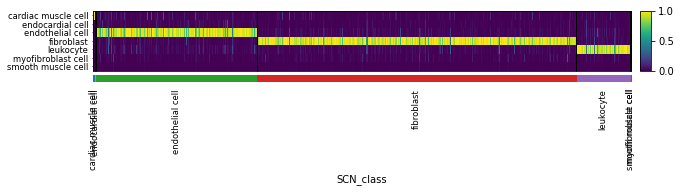

In [20]:
adVal = pySCN.scn_classify(expVal, cgenesA, xpairs, tspRF, nrand = 0)

ax = sc.pl.heatmap(adVal, adVal.var_names.values, groupby='SCN_class', cmap='viridis', dendrogram=False, swap_axes=True)

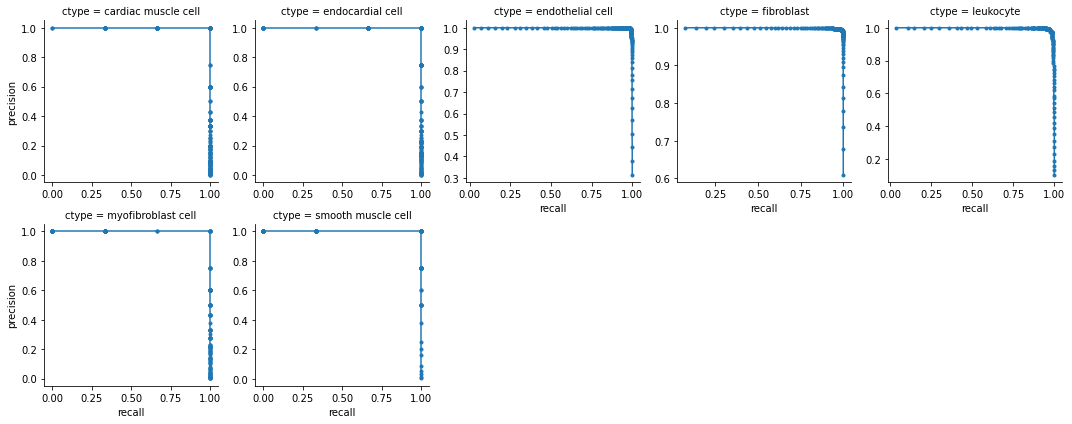

In [81]:
assessment =  pySCN.assess_comm(expTrain, adVal, resolution = 0.005, nRand = 0, dLevelSID = "cell", classTrain = "cell_ontology_class", classQuery = "cell_ontology_class")

pySCN.plot_PRs(assessment)
plt.show()

In [82]:
assessment ['accuracy']

0.9888579387186629

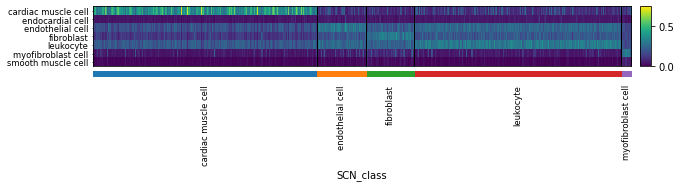

In [83]:
adIPSCM = pySCN.scn_classify(adQuery, cgenesA, xpairs, tspRF, nrand = 0)

ax = sc.pl.heatmap(adIPSCM, adIPSCM.var_names.values, groupby='SCN_class', cmap='viridis', dendrogram=False, swap_axes=True)

In [84]:
pySCN.add_classRes(adQuery, adIPSCM)

In [85]:
engineered_cardiomyocytes = adQuery[adQuery.obs["SCN_class"] == "cardiac muscle cell"]
engineered_cardiomyocytes.obs

,cardiac muscle cell,endocardial cell,endothelial cell,fibroblast,leukocyte,myofibroblast cell,smooth muscle cell,SCN_class
AAACCTGAGCATCATC-1,0.636,0.020,0.144,0.055,0.103,0.030,0.012,cardiac muscle cell
AAACCTGGTTTCGCTC-1,0.262,0.048,0.177,0.126,0.181,0.169,0.037,cardiac muscle cell
AAACGGGAGCCGCCTA-1,0.305,0.039,0.232,0.141,0.247,0.032,0.004,cardiac muscle cell
AAACGGGGTGAAGGCT-1,0.363,0.039,0.196,0.125,0.228,0.040,0.009,cardiac muscle cell
AAACGGGTCGTCACGG-1,0.528,0.030,0.142,0.092,0.148,0.052,0.008,cardiac muscle cell
...,...,...,...,...,...,...,...,...
TTTGGTTGTTTCGCTC-1,0.544,0.031,0.124,0.103,0.140,0.049,0.009,cardiac muscle cell
TTTGGTTTCCTGTAGA-1,0.212,0.032,0.156,0.157,0.148,0.206,0.089,cardiac muscle cell
TTTGGTTTCTCTGAGA-1,0.370,0.053,0.199,0.133,0.209,0.034,0.002,cardiac muscle cell
TTTGGTTTCTGTGCAA-1,0.312,0.061,0.227,0.144,0.207,0.045,0.004,cardiac muscle cell
